# Practice for SQL with Pandas

Import the required libraries and bring in the data.

In [1]:
# Run this code without change

import sqlite3
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt

conn = sqlite3.Connection('data (3).sqlite')

1. Read in the products table as a Pandas dataframe.
- Call it `df`
- Look at the first five rows

In [2]:
df = pd.read_sql("""
                          SELECT *
                          FROM products
                          """, conn)
df.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


2. Using `read.sql()` from Pandas
- Determine the average MSRP by product line
- Give the average the alias of avgMSRP
- Sort alphabetically A-Z by product line

In [3]:
my_query = """
SELECT productLine, 
    AVG(buyPrice) as avgbuyPrice,
    SUM(quantityOrdered) as TotalOrdered,    
    AVG(priceEach) as avgMSRP
    FROM products
        JOIN orderDetails
            USING(productCode)
GROUP BY productLine
ORDER BY productLine
"""

df_query = pd.read_sql(my_query, conn)
df_query

,productLine,avgbuyPrice,TotalOrdered,avgMSRP
0,Classic Cars,65.271901,35582,108.004475
1,Motorcycles,50.849554,12778,87.322925
2,Planes,49.629167,11872,80.327202
3,Ships,46.997265,8532,77.752041
4,Trains,43.923333,2818,67.140494
5,Trucks and Buses,56.329091,11001,92.709253
6,Vintage Cars,46.017686,22933,78.356088


In [5]:
df_query['avgMSRP'].mean()

84.51606836998066

3. Using matplotlib, create a scatterplot that shows `buyPrice` vs `MSRP`

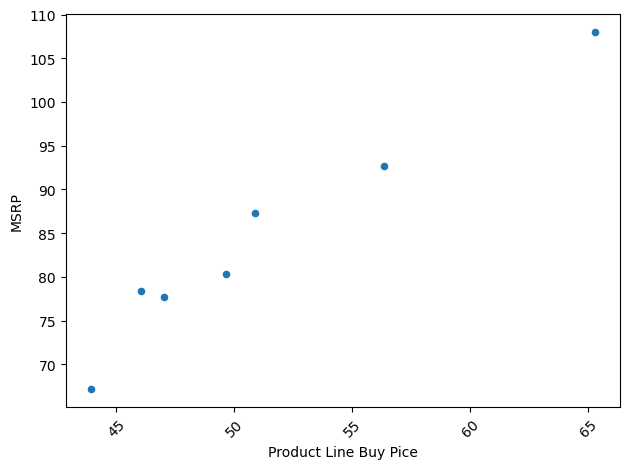

In [6]:
df_query.plot.scatter(x='avgbuyPrice', y='avgMSRP')
plt.ylabel('MSRP')
plt.xlabel('Product Line Buy Pice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

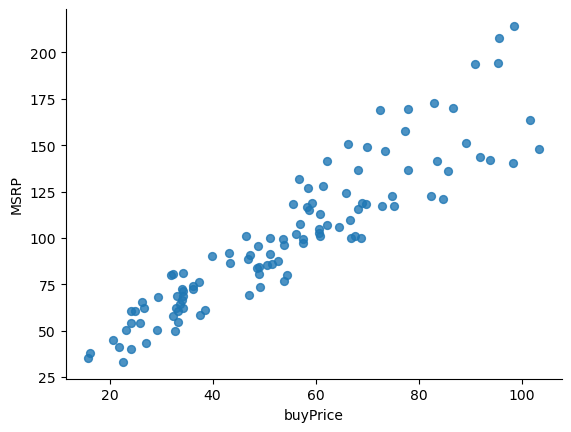

In [7]:
df.plot(kind='scatter', x='buyPrice', y='MSRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

4. Use the DataFrame `eval` method in place to find the difference of MSRP and the buy price
- Call this new column `Price_Difference'
- Look at the first five rows
- Give the number of rows

In [8]:
df = df.eval('Price_Difference = MSRP-buyPrice')
df.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,Price_Difference
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,46.89
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30,115.72
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94,49.95
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66,102.64
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00,50.32


5. Using matplotlib, create a histogram of `Price_Difference`

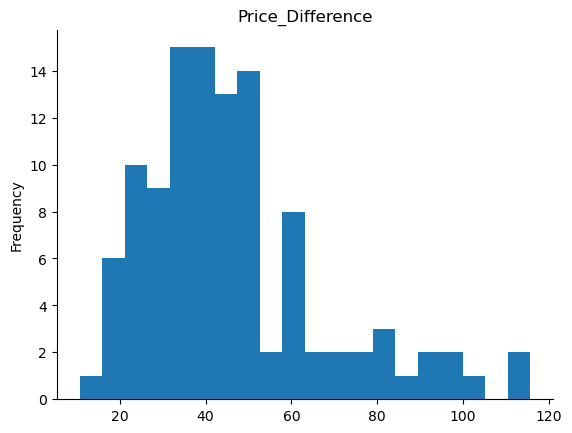

In [9]:
df['Price_Difference'].plot(kind='hist', bins=20, title='Price_Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

6. Using slicing, create a DataFrame that contains 'Price_Difference' that is greater than or equal to $50.
- Call this `df_50'
- Look at the number of rows
  - How does this number compare to the number of rows of `df`?

In [12]:
df_50 = df[df['Price_Difference'] >= 50]
df_50

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,Price_Difference
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30,115.72
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66,102.64
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00,50.32
6,S12_1099,1968 Ford Mustang,Classic Cars,1:12,Autoart Studio Design,"Hood, doors and trunk all open to reveal highl...",68,95.34,194.57,99.23
7,S12_1108,2001 Ferrari Enzo,Classic Cars,1:12,Second Gear Diecast,Turnable front wheels; steering function; deta...,3619,95.59,207.80,112.21
8,S12_1666,1958 Setra Bus,Trucks and Buses,1:12,Welly Diecast Productions,"Model features 30 windows, skylights & glare r...",1579,77.90,136.67,58.77
9,S12_2823,2002 Suzuki XREO,Motorcycles,1:12,Unimax Art Galleries,"Official logos and insignias, saddle bags loca...",9997,66.27,150.62,84.35
10,S12_3148,1969 Corvair Monza,Classic Cars,1:18,Welly Diecast Productions,"1:18 scale die-cast about 10"" long doors open,...",6906,89.14,151.08,61.94
12,S12_3891,1969 Ford Falcon,Classic Cars,1:12,Second Gear Diecast,Turnable front wheels; steering function; deta...,1049,83.05,173.02,89.97
14,S12_4473,1957 Chevy Pickup,Trucks and Buses,1:12,Exoto Designs,"1:12 scale die-cast about 20"" long Hood opens,...",6125,55.70,118.50,62.80


In [14]:
len(df_50)

32

In [15]:
len(df)

110